In [9]:
import datetime
import quandl
import pandas as pd
import math, csv
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.axes as Axes
from matplotlib import style
import pickle
style.use("ggplot")

In [10]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [11]:
X = np.array(df.drop(columns = 'label'))
print(X)
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
# clf = LinearRegression(n_jobs = 0)
# clf.fit(X_train, y_train)
# # Save linear reg model without having to train for each use
# with open('linear_reg_GOOG.pickle', 'wb') as f:
#     pickle.dump(clf, f) # Dumps classifier to f
## To Open Classifier
pickle_in = open('linear_reg_GOOG.pickle','rb')
clf = pickle.load(pickle_in)
accuracy = clf.score(X_test, y_test)
# print(accuracy)

[[ 5.03228418e+01  3.71256291e+00  3.24967503e-01  4.46590000e+07]
 [ 5.43226889e+01  7.10922353e-01  7.22700723e+00  2.28343000e+07]
 [ 5.48693765e+01  3.72943327e+00 -1.22788010e+00  1.82561000e+07]
 ...
 [ 1.02655000e+03  3.91895183e+00 -2.36072933e+00  2.41351700e+06]
 [ 1.05409000e+03  4.91419139e-01  3.32191129e-01  3.27240900e+06]
 [ 1.00694000e+03  5.72030111e+00 -5.35388664e+00  2.94095700e+06]]


In [12]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1077.12477699 1091.84318599 1105.88371062 1100.1685447  1093.56402885
 1091.03089917 1089.56670092 1086.48476185 1080.20269348 1075.84655251
 1073.65874907 1093.78642835 1112.0691524  1115.99411856 1131.10885422
 1135.02490001 1133.40793541 1131.19218144 1132.86913818 1151.798267
 1150.08196202 1160.50909089 1156.91178565 1164.92766435 1185.59875182
 1197.52639509 1191.28207316 1203.65906689 1209.14789077 1207.17830408
 1197.9695118  1203.51406908 1202.29055052 1137.43735916 1083.75463222] 0.9771684963152945 35


In [13]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [14]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<Axes: xlabel='Date'>

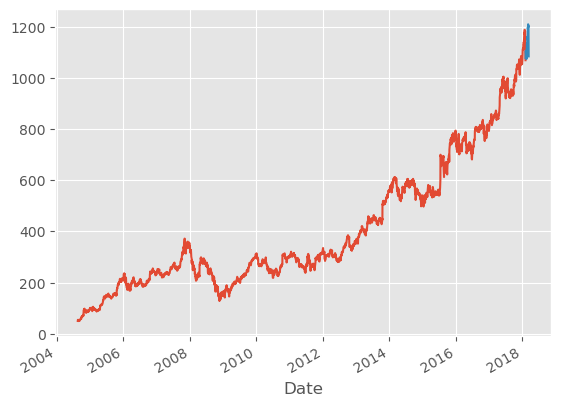

In [15]:
df['Adj. Close'].plot()
df['Forecast'].plot()